# Plot the wind direction during precipitation events
- from Eklima and the 
- minuetly observations

In [1]:
import numpy as np
import netCDF4
import pandas as pd

import sys
#sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/windrose')
sys.path.append('/Volumes/SANDISK128/Documents/Research_UiO_50/Python/windrose/')
from windrose import WindroseAxes
from matplotlib import colors
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
import createFolder as cF
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
m = ['11', '12', '01', '02', '03']

In [3]:
savefig = 1
form = 'png'
figdir = '../../Figures/Weathermast/Wind'

## Eklima

In [4]:
## load all necessary days and create an array for
# - double fence accumulation
# - 10m wind 

eklima_double_fence_acc = []
eklima_wind_dir_10m = []
eklima_wind_speed_10m = []
for month in m:
    if month == '11':
        t = np.arange(8,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    eklima_f = dict()
    
    tid = dict()
    for day in t:
        
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        eklima_dirnc = '../../Data/Eklima/Haukeliseter/precip_wind_temp_%s%s%s.nc' %(year,month,day)
        
        eklima_f[int(year+month+day)] = netCDF4.Dataset(eklima_dirnc, 'r')
        eklima_double_fence_acc.append(eklima_f[int(year+month+day)].variables['RR_1'][:])

        eklima_wind_dir_10m.append(eklima_f[int(year+month+day)].variables['DD'][:])
    #    tid[int(year+month+day)] = np.arange(wind_dir_10m.shape[0])

        eklima_wind_speed_10m.append(eklima_f[int(year+month+day)].variables['FF'][:])
        
        eklima_f[int(year+month+day)].close

eklima_double_fence_acc = np.array(eklima_double_fence_acc)
eklima_wind_dir_10m     = np.array(eklima_wind_dir_10m)
eklima_wind_speed_10m   = np.array(eklima_wind_speed_10m)

In [5]:
viridis = plt.get_cmap('viridis')
champ = 255.
no1 = np.array([79,94,26])/champ
no2 = np.array([131,156,45])/champ
no3 = np.array([71,153,112])/champ
no4 = np.array([77,111,157])/champ
no5 = np.array([157,58,55])/champ
no6 = np.array([211,120,50])/champ
no7 = np.array([218,181,70])/champ

cmap = colors.ListedColormap([no1, no2, no3, no4, no5, no6, no7])

plot saved: ../../Figures/Weathermast/Wind/eklima_wind_precip_events_2016_2017.png


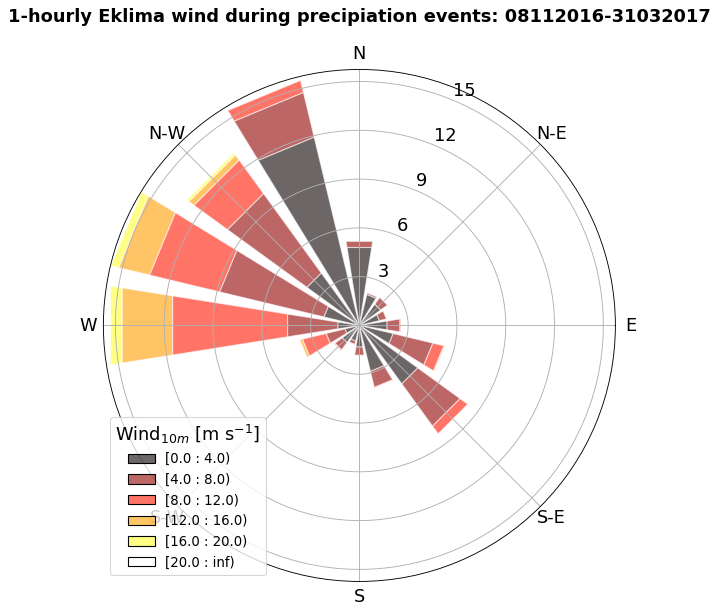

In [6]:
ax0 = WindroseAxes.from_ax()
ax0.bar(  eklima_wind_dir_10m[np.logical_and(~np.isnan(eklima_double_fence_acc[:,:]), 
                                                       eklima_double_fence_acc[:,:] >= 0.0)], 
        eklima_wind_speed_10m[np.logical_and(~np.isnan(eklima_double_fence_acc[:,:]), 
                                                       eklima_double_fence_acc[:,:] >= 0.0)], 
      # normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4),alpha=0.5)
        normed=True, opening=0.8, edgecolor ='white',cmap=plt.get_cmap('hot'), bins = np.arange(0,24,4),alpha=0.6)
        
ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_yticks(np.arange(3, 18, step=3))
ax0.set_yticklabels(np.arange(3, 18, step=3))
ax0.set_title('1-hourly Eklima wind during precipiation events: 08112016-31032017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'eklima_wind_precip_events_2016_2017.%s' %form
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: %s/%s' %(figdir,fig_name))

## Minuetly Data

In [7]:
## load all necessary days and create an array for
# - double fence accumulation
# - 10m wind 

obs_double_fence_acc = []
obs_double_fence_acc_mean = []
obs_wind_dir_10m = []
obs_wind_speed_10m = []
for month in m:
    if month == '11':
        t = np.arange(7,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    obs_f = dict()
    
    tid = dict()
    for day in t:
        
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        obs_dirnc = '../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day)
        
        obs_f[int(year+month+day)] = netCDF4.Dataset(obs_dirnc, 'r')
        obs_double_fence_acc.append(obs_f[int(year+month+day)].variables['double_fence_accum'][:])
        obs_double_fence_acc_mean.append(np.nanmean(obs_f[int(year+month+day)].variables['double_fence_accum'][:], axis=1))
       # double_fence_acc_mean.append(np.nanmean(double_fence_acc,axis=1))

        obs_wind_dir_10m.append(obs_f[int(year+month+day)].variables['10m_wind_dir_mast1'][:])
    #    tid[int(year+month+day)] = np.arange(wind_dir_10m.shape[0])

        obs_wind_speed_10m.append(obs_f[int(year+month+day)].variables['10m_wind_speed_mast1'][:])
        
        obs_f[int(year+month+day)].close
        
obs_double_fence_acc_mean = np.array(obs_double_fence_acc_mean)
obs_wind_dir_10m          = np.array(obs_wind_dir_10m)
obs_wind_speed_10m        = np.array(obs_wind_speed_10m)

In [8]:
## Create a rolling mean to smoothen out the data
# attach the last 9 minutes from the previous day to calculate the rolling mean every 10 minutes
obs_dofe_acc   = []
obs_wind_dir   = []
obs_wind_speed = []
for i in range(obs_double_fence_acc_mean.shape[0]-1):
    pp = (np.concatenate((obs_double_fence_acc_mean[i,-9:],obs_double_fence_acc_mean[i+1,:])))
    obs_dofe_acc.append(pp)
    wd = (np.concatenate((obs_wind_dir_10m[i,-9:], obs_wind_dir_10m[i+1,:])))
    obs_wind_dir.append(wd)
    ws = (np.concatenate((obs_wind_speed_10m[i,-9:], obs_wind_speed_10m[i+1,:])))
    obs_wind_speed.append(ws)



# Calculate the moving average. That is, take
# the first ten values, average them, 
# then drop the first and add the eleventh, etc.
obs_dofe_acc = pd.DataFrame(np.array(obs_dofe_acc)[:,:])
obs_dofe_acc_rolling = obs_dofe_acc.rolling(window=10,axis=1).mean()
obs_dofe_acc_rolling = obs_dofe_acc_rolling.values
obs_dofe_acc_rolling = np.array(obs_dofe_acc_rolling)[:,9:]

obs_wind_dir = pd.DataFrame(np.array(obs_wind_dir)[:,:])
obs_wind_dir_rolling = obs_wind_dir.rolling(window=10,axis=1).mean()
obs_wind_dir_rolling = obs_wind_dir_rolling.values
obs_wind_dir_rolling = np.array(obs_wind_dir_rolling)[:,9:]

obs_wind_speed = pd.DataFrame(np.array(obs_wind_speed))
obs_wind_speed_rolling = obs_wind_speed.rolling(window=10,axis=1).mean()
obs_wind_speed_rolling = obs_wind_speed_rolling.values
obs_wind_speed_rolling = np.array(obs_wind_speed_rolling)[:,9:]

In [19]:
# calculate the precipitation difference, since the minutelty data is accumulated from the beginning

obs_diff = np.empty(shape=(obs_dofe_acc_rolling.shape))#/60))
obs_diff[:] =  np.nan

#for i in np.arange(np.array(double_fence_acc_mean).shape[0]):#/60):
for i in range(0,obs_dofe_acc_rolling.shape[1]-1):
    obs_diff[:,int(i)] = np.array(obs_dofe_acc_rolling)[:,int(i)+1] - np.array(obs_dofe_acc_rolling)[:,int(i)]

plot saved: ../../Figures/Weathermast/Wind/obs_wind_precip_events_2016_2017.png


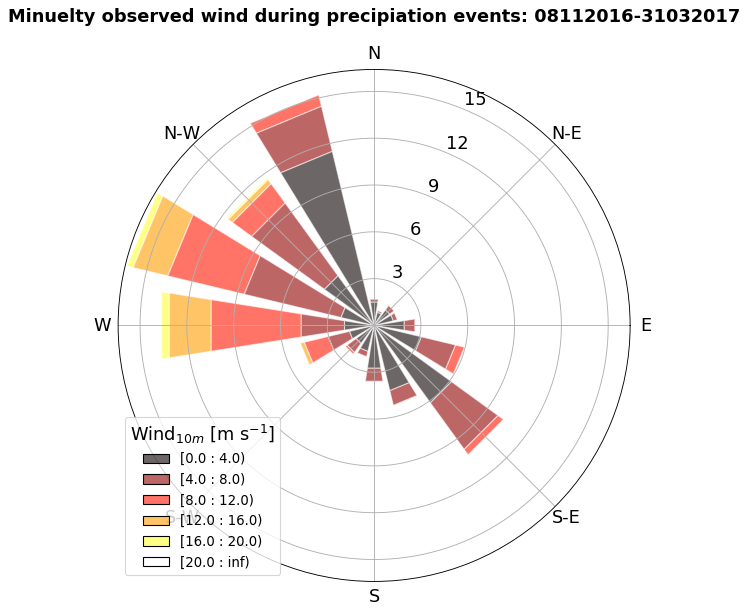

In [39]:
ax0 = WindroseAxes.from_ax()
ax0.bar(  obs_wind_dir_rolling[np.logical_and(~np.isnan(obs_diff), obs_diff >= 0.)], 
        obs_wind_speed_rolling[np.logical_and(~np.isnan(obs_diff), obs_diff >= 0.)], 
       # normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4),alpha=0.5)
        normed=True, opening=0.8, edgecolor ='white',cmap=plt.get_cmap('hot'), bins = np.arange(0,24,4),alpha=0.6)
     
ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_yticks(np.arange(3, 18, step=3))
ax0.set_yticklabels(np.arange(3, 18, step=3))
ax0.set_title('Minuelty observed wind during precipiation events: 08112016-31032017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'obs_wind_precip_events_2016_2017.%s' %form
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: %s/%s' %(figdir,fig_name))